In [103]:
# Importing necessary libraries & modules; checking system compatibility

import sys, pip, numpy as np, pandas as pd, matplotlib.pyplot as plt
from streaming_func import clean_streaming_df, unique_actors_per_genre
from pathlib import Path

In [104]:
# Loading Amazon Prime csv dataset & displaying first few entries for understanding structure & content

DATA_DIR = Path(".")
amazon_df = pd.read_csv(DATA_DIR / "amazon_prime_titles.csv")
print(amazon_df.head(), '\n')
print(amazon_df.info())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [105]:
# Extracting unique media types from the 'listed_in' column to check for any anomalous genre types & entries
unique_amazon_genre_types = amazon_df.listed_in.unique()
unique_amazon_media_types = amazon_df.type.unique()

# Displaying unique media types in the Amazon Prime dataset
print(f'Unique media types in Amazon Prime dataset: {[type for type in unique_amazon_media_types]} \n')

# Displaying unique media genre lists in the dataset for additional visual debugging & validation§ 
print(f"Unique media genre lists in Amazon Prime dataset: \n{unique_amazon_genre_types}")

Unique media types in Amazon Prime dataset: ['Movie', 'TV Show'] 

Unique media genre lists in Amazon Prime dataset: 
['Comedy, Drama' 'Drama, International' 'Action, Drama, Suspense'
 'Documentary' 'Drama, Fantasy' 'Fantasy, Kids'
 'Documentary, Special Interest' 'Comedy'
 'Action, Science Fiction, Suspense' 'Drama' 'Adventure, Kids'
 'Horror, Suspense' 'Documentary, Sports' 'Horror, Science Fiction'
 'Kids, Special Interest' 'Comedy, Talk Show and Variety'
 'Science Fiction' 'Kids' 'Action, Anime, Comedy'
 'Arts, Entertainment, and Culture, Comedy, Drama' 'TV Shows'
 'Animation, Anime, Fantasy' 'Action, Adventure, Animation' 'Anime, Kids'
 'Music Videos and Concerts' 'Drama, Suspense' 'Fitness, Special Interest'
 'Faith and Spirituality, Special Interest' 'Special Interest' 'Fitness'
 'Action, Military and War, Western'
 'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety'
 'Action, Western' 'Documentary, Science Fiction'
 'Adventure, Animation, Kids' 'Fantasy, Science F

In [106]:
# Preliminary check of unique countries in the 'country' column
unique_amazon_countries = amazon_df.country.unique()
print("Countries in amazon prime dataset: \n", unique_amazon_countries)

Countries in amazon prime dataset: 
 ['Canada' 'India' 'United States' 'United Kingdom' 'France' 'Spain' nan
 'Italy' 'United Kingdom, France' 'United States, Italy'
 'United States, India' 'United Kingdom, United States'
 'United States, United Kingdom, Germany' 'Japan'
 'China, United States, United Kingdom'
 'Denmark, United Kingdom, Czech Republic, Netherlands'
 'United States, Ireland' 'United States, United Kingdom, Canada'
 'United Kingdom, United States, India' 'United Kingdom, India'
 'United States, China' 'Canada, United States' 'United States, Thailand'
 'Brazil, United States, India' 'Switzerland, India'
 'United Kingdom, Canada, United States' 'Germany' 'Australia' 'Belgium'
 'Chile, Argentina, United States' 'Mexico'
 'Denmark, Sweden, United States' 'Netherlands'
 'United States, United Kingdom' 'New Zealand' 'United States, Portugal'
 'United States, France' 'Canada, United States, Brazil'
 'France, United States' 'India, United States' 'India, Sweden'
 'United Kingdom

In [107]:
# Initual Data cleaning function for Amazon Prime dataset & other streaming datasets for easier exploration & manipulation

'''
def clean_amazon_df(df_raw):
    import pandas as pd
    
    df = df_raw.copy()
    
    # Standardize column names (if needed)
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    # now columns are like 'show_id', 'type', 'title', 'director', ...
    
    # Split multi-value string columns into lists
    for col in ["cast", "country"]:             #, "listed_in"]:
        df[col] = df[col].fillna("").apply(
            lambda s: [x.strip() for x in s.split(",")] if s else []
        )

    ### Special splitting for 'listed_in', protecting "Arts, Entertainment, and Culture" as a single & outlying genre
    SPECIAL_GENRE = "Arts, Entertainment, and Culture"
    PLACEHOLDER = "__ARTS_ENTERTAINMENT_AND_CULTURE__"

    def split_listed_in(s):
        if not isinstance(s, str) or not s.strip():
            return []

        # protect the composite genre by removing its commas temporarily
        s_protected = s.replace(SPECIAL_GENRE, PLACEHOLDER)

        # normal split on commas
        parts = [p.strip() for p in s_protected.split(",") if p.strip()]

        # restore the original name
        cleaned = [
            p.replace(PLACEHOLDER, SPECIAL_GENRE)
            for p in parts
        ]
        return cleaned

    df["listed_in"] = df["listed_in"].apply(split_listed_in)
    ###

    # Extract duration as numeric (for movies) or number of seasons/episodes (for TV shows)    
    def parse_minutes(x):
        if isinstance(x, str):
            s = x.strip()
            if "min" in s:
                try:
                    return int(s.split()[0])
                except ValueError:
                    return None
        return None
    
    def parse_seasons(x):
        if isinstance(x, str):
            s = x.strip()
            # handle both singular "Season" and plural "Seasons"
            if "Season" in s or "Seasons" in s:
                try:
                    return int(s.split()[0])
                except ValueError:
                    return None
        return None
    
    df["duration_mins"] = df["duration"].apply(parse_minutes)
    df["duration_seasons"] = df["duration"].apply(parse_seasons)
    df["release_year"] = pd.to_numeric(df["release_year"], errors="coerce")
    df["rating"] = df["rating"].fillna("NaN")

    return df

test_df = clean_amazon_df(amazon_df)
print(test_df.head(), '\n')
'''

# Using refined imported general use cleaning function from streaming_func.py to clean the Amazon Prime dataset
test_amazon_df = clean_streaming_df(amazon_df)
print(test_amazon_df.head(), '\n')

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast           country  \
0   [Brendan Gleeson, Taylor Kitsch, Gordon Pinsent]          [Canada]   
1  [Mahesh Manjrekar, Abhay Mahajan, Sachin Khede...           [India]   
2  [Tom Sizemore, Lorenzo Lamas, Robert LaSardo, ...   [United States]   
3  [Interviews with: Pink, Adele, Beyoncé, Britne...   [United States]   
4  [Harry Dean Stanton, Kieran O'Brien, George Co...  [United Kingdom]   

       date_added  release_year rating duration                  listed_in  \
0  March 30, 2021          2014    NaN  113 min            [Comedy, Drama]   
1  March 30, 2021          2018    13+  110 min   

In [108]:
# Extracting unique genre types from the 'listed_in' column for Amazon Prime dataset
amazon_media = test_amazon_df["listed_in"]

amazon_prime_genres = []
for film in amazon_media:
    for genre in film:
        if genre not in amazon_prime_genres:
            amazon_prime_genres.append(genre)

print(amazon_prime_genres, '\n')
print(f'Total number unique genres for Amazon Prime media: {len(amazon_prime_genres)}')

['Comedy', 'Drama', 'International', 'Action', 'Suspense', 'Documentary', 'Fantasy', 'Kids', 'Special Interest', 'Science Fiction', 'Adventure', 'Horror', 'Sports', 'Talk Show and Variety', 'Anime', 'Arts', 'Entertainment', 'and Culture', 'TV Shows', 'Animation', 'Music Videos and Concerts', 'Fitness', 'Faith and Spirituality', 'Military and War', 'Western', 'LGBTQ', 'Romance', 'Unscripted', 'Young Adult Audience', 'Arthouse', 'Historical'] 

Total number unique genres for Amazon Prime media: 31


In [109]:
# Extracting unique countries from the 'country' column for Amazon Prime dataset
amazon_countries = test_amazon_df["country"]

amazon_prime_countries = []
for country_list in amazon_countries:
    for country in country_list:
        if country not in amazon_prime_countries:
            amazon_prime_countries.append(country)

print(amazon_prime_countries, '\n')
print(f'Total number unique countries for Amazon Prime media production: {len(amazon_prime_countries)}')

['Canada', 'India', 'United States', 'United Kingdom', 'France', 'Spain', 'Italy', 'Germany', 'Japan', 'China', 'Denmark', 'Czech Republic', 'Netherlands', 'Ireland', 'Thailand', 'Brazil', 'Switzerland', 'Australia', 'Belgium', 'Chile', 'Argentina', 'Mexico', 'Sweden', 'New Zealand', 'Portugal', 'Hungary', 'Iran', 'Luxembourg', 'South Africa', 'Austria', 'Monaco', 'Egypt', 'United Arab Emirates', 'Singapore', 'South Korea', 'Afghanistan', 'Colombia', 'Norway', 'Kosovo', 'Kazakhstan', 'Malaysia', 'Poland', 'Albania', 'Georgia', 'Hong Kong'] 

Total number unique countries for Amazon Prime media production: 45


In [110]:
# Movies-only DataFrame
test_movies_df = test_amazon_df[test_amazon_df["type"] == "Movie"].copy()

# TV-Shows-only DataFrame
test_tv_shows_df = test_amazon_df[test_amazon_df["type"] == "TV Show"].copy()

print("Movies:", len(test_movies_df))
print("TV Shows:", len(test_tv_shows_df))

Movies: 7814
TV Shows: 1854


In [111]:
test_amazon_df.duration_seasons.describe()

count    1854.000000
mean        1.723301
std         1.821656
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        29.000000
Name: duration_seasons, dtype: float64

In [112]:
test_amazon_df.duration_mins.describe()

count    7814.000000
mean       91.311876
std        40.333086
min         0.000000
25%        75.000000
50%        91.000000
75%       106.000000
max       601.000000
Name: duration_mins, dtype: float64

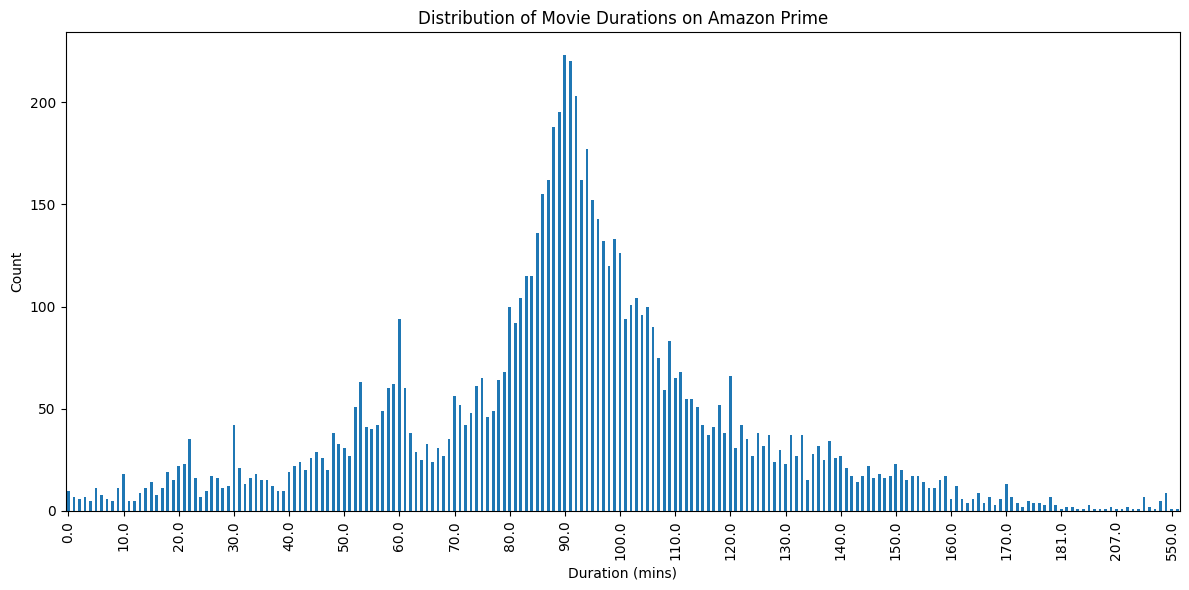

In [113]:
# Histogram of movie durations in Amazon Prime dataset
movies_ax = test_movies_df.groupby("duration_mins").size().plot(kind="bar", figsize=(12,6))

# Adjust x-ticks to show a maximum of 20 ticks for better readability
movies_ax.set_xticks(movies_ax.get_xticks()[::len(movies_ax.get_xticks()) // 20])

plt.title("Distribution of Movie Durations on Amazon Prime")
plt.xlabel("Duration (mins)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

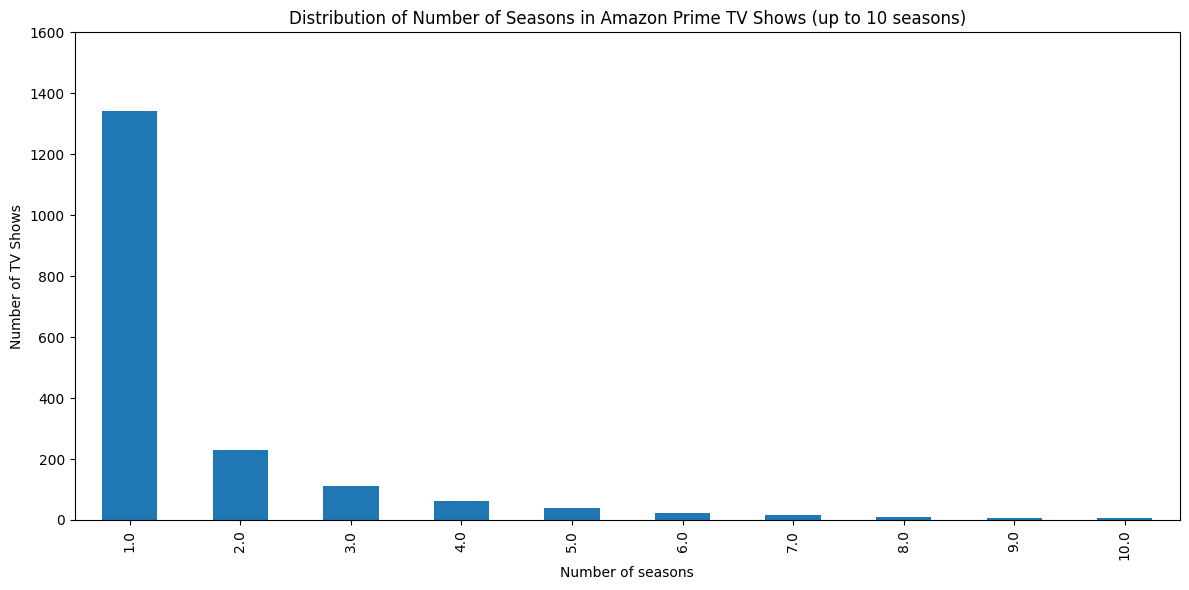

In [114]:
# Filtering for TV shows with 10 seasons or less, as few tv shows ever suceed enough tp exceed this number
filtered_tv = test_tv_shows_df[test_tv_shows_df["duration_seasons"] <= 10]

shows_ax = filtered_tv.groupby("duration_seasons").size().plot(kind="bar", figsize=(12,6))

shows_ax.set_xticks(shows_ax.get_xticks()[::len(shows_ax.get_xticks()) // 10])
shows_ax.set_yticks(shows_ax.get_yticks()[::len(shows_ax.get_yticks()) // 8])
shows_ax.set_xlabel("Number of seasons")
shows_ax.set_ylabel("Number of TV Shows")
shows_ax.set_title("Distribution of Number of Seasons in Amazon Prime TV Shows (up to 10 seasons)")
plt.tight_layout()
plt.show()

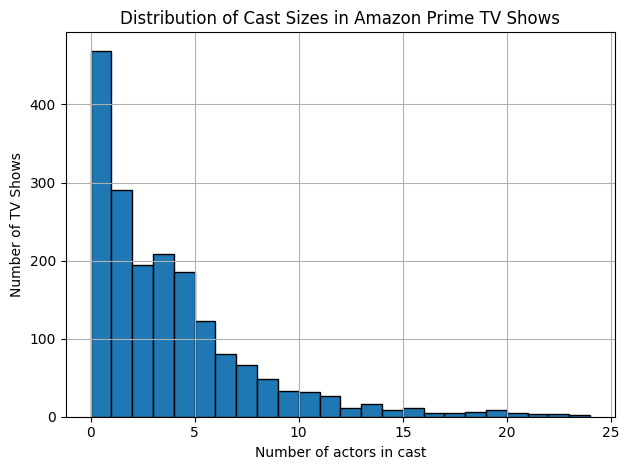

In [115]:
# Histogram of cast sizes in Amazon Prime TV Shows
test_tv_shows_df["cast_count"] = test_tv_shows_df["cast"].apply(len)
test_tv_shows_df["cast_count"].hist(bins=range(0, 25), edgecolor='black')

plt.xlabel("Number of actors in cast")
plt.ylabel("Number of TV Shows")
plt.title("Distribution of Cast Sizes in Amazon Prime TV Shows")
plt.tight_layout()
plt.show()

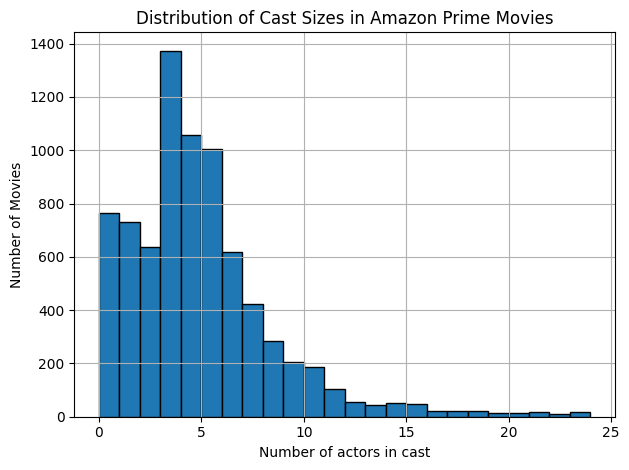

In [116]:
# Histogram of cast sizes in Amazon Prime Movies
test_movies_df["cast_count"] = test_movies_df["cast"].apply(len)
test_movies_df["cast_count"].hist(bins=range(0, 25), edgecolor='black')

plt.xlabel("Number of actors in cast")
plt.ylabel("Number of Movies")
plt.title("Distribution of Cast Sizes in Amazon Prime Movies")
plt.tight_layout()
plt.show()

In [117]:
# Basic counts of movies vs TV shows in the Amazon Prime dataset
movies = test_amazon_df.type == 'Movie'
tv_shows = test_amazon_df.type == 'TV Show'
print("Total entries in dataset:", test_amazon_df.shape[0])
print("Number of movies:", movies.sum())
print("Number of TV shows:", tv_shows.sum(), '\n')
print(test_amazon_df[movies].listed_in.head(10))

Total entries in dataset: 9668
Number of movies: 7814
Number of TV shows: 1854 

0                        [Comedy, Drama]
1                 [Drama, International]
2              [Action, Drama, Suspense]
3                          [Documentary]
4                       [Drama, Fantasy]
5                        [Fantasy, Kids]
6        [Documentary, Special Interest]
7                               [Comedy]
8    [Action, Science Fiction, Suspense]
9                                [Drama]
Name: listed_in, dtype: object


In [118]:
# Extracting unique cast members from the Amazon Prime dataset
test_amazon_casts = test_amazon_df["cast"]    # Series of lists

# Extract unique cast members from the Amazon dataset & add to a set
test_amazon_unique_cast_members = set()

# Iterate through each cast entry in the dataset
for cast_list in test_amazon_casts:

    # cast_list is already a list (or []), thanks to clean_streaming_df
    if not cast_list:          # handles empty lists
        continue

    # Split multiple cast members & add unique ones to the set
    for actor in cast_list:

        # paranoia, but good check to have
        if not isinstance(actor, str):
            continue           

        actor = actor.strip()
        
        # skip empty strings
        if actor:  
            test_amazon_unique_cast_members.add(actor)

test_amazon_unique_cast_members = list(test_amazon_unique_cast_members)

In [119]:
print(test_amazon_unique_cast_members[:10], '\n')
print(f'Total unique cast members on Amazon Prime: {len(test_amazon_unique_cast_members)}')

['Jonas Smulders', 'Steve Lukather', 'Vince Colosimo', 'Forest Whitaker', 'Agostino Borgato', 'Andrew Creer', 'Anthony Asbury', 'Ron Berglas', 'Axel South', 'Rena Takeda(Mizusawa Mizuki)'] 

Total unique cast members on Amazon Prime: 31848


In [120]:
# explode movie & tv-show genres into separate rows
movies_df_exploded = test_movies_df.explode("listed_in")
tv_shows_df_exploded = test_tv_shows_df.explode("listed_in")

# amazon tv shows & movies cast counts
movies_df_exploded["cast_count"] = movies_df_exploded["cast"].apply(len)
tv_shows_df_exploded["cast_count"] = tv_shows_df_exploded["cast"].apply(len)
    
# Movie genres cast counts
movie_genre_cast_counts = movies_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(movie_genre_cast_counts)

listed_in
Drama                        18423
Comedy                        9804
Action                        8357
Suspense                      7936
Horror                        4171
Romance                       3271
Science Fiction               2175
Documentary                   2110
Kids                          1936
Special Interest              1670
International                 1583
Adventure                     1515
Arts                          1514
Entertainment                 1514
and Culture                   1514
Western                       1491
Arthouse                       691
Animation                      585
Sports                         534
Young Adult Audience           492
LGBTQ                          477
Military and War               321
Fantasy                        314
Faith and Spirituality         298
Music Videos and Concerts      234
Historical                      86
Fitness                         73
Anime                           71
Talk Show 

In [121]:
# TV show genres cast counts
tv_show_cast_counts = tv_shows_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(tv_show_cast_counts)

listed_in
Drama                        2665
Comedy                       1380
Kids                         1119
TV Shows                      741
Suspense                      710
Action                        677
Documentary                   554
Animation                     530
Special Interest              477
Romance                       450
Unscripted                    423
Science Fiction               390
International                 341
Historical                    143
Arts                          142
Entertainment                 142
and Culture                   142
LGBTQ                         137
Sports                        134
Anime                         124
Horror                        114
Adventure                     105
Fantasy                        94
Western                        82
Young Adult Audience           44
Music Videos and Concerts      43
Military and War               29
Talk Show and Variety          27
Faith and Spirituality         26
Fitn

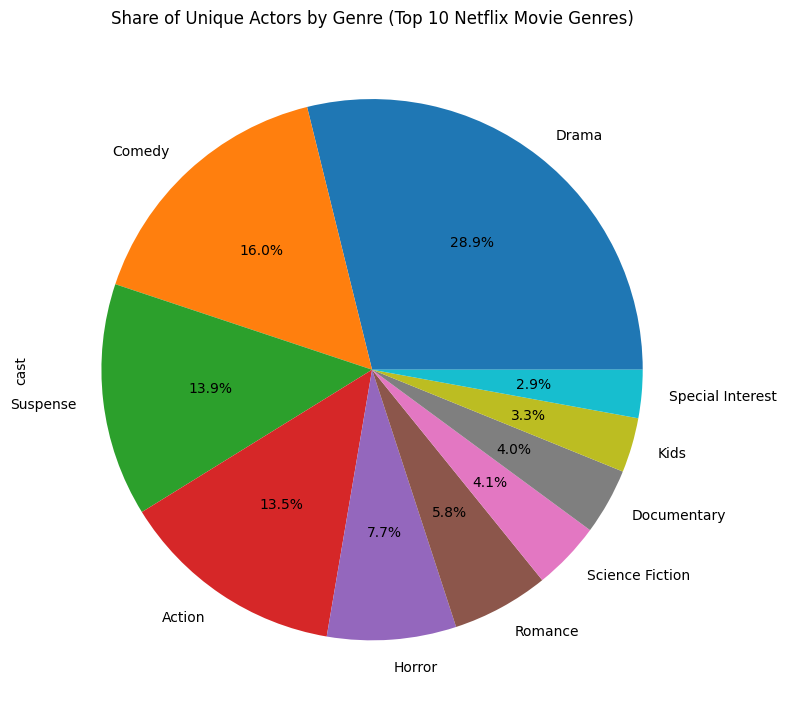

In [122]:
# Pie chart of unique actors per movie genre (top 10 genres only)

from streaming_func import unique_actors_per_genre
movie_unique_actors_per_genre = unique_actors_per_genre(test_movies_df)

top_n = 10
top_genres = movie_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.title("Share of Unique Actors by Genre (Top 10 Netflix Movie Genres)")
plt.tight_layout()
plt.show()

In [123]:
# explode netflix tv shows genres into separate rows
shows_df_exploded = test_tv_shows_df.explode("listed_in")
shows_df_exploded["cast_count"] = shows_df_exploded["cast"].apply(len)

# sorted movie genre cast counts by ascending order to identify genres with largest casts
show_genre_cast_counts = shows_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(show_genre_cast_counts)

listed_in
Drama                        2665
Comedy                       1380
Kids                         1119
TV Shows                      741
Suspense                      710
Action                        677
Documentary                   554
Animation                     530
Special Interest              477
Romance                       450
Unscripted                    423
Science Fiction               390
International                 341
Historical                    143
Arts                          142
Entertainment                 142
and Culture                   142
LGBTQ                         137
Sports                        134
Anime                         124
Horror                        114
Adventure                     105
Fantasy                        94
Western                        82
Young Adult Audience           44
Music Videos and Concerts      43
Military and War               29
Talk Show and Variety          27
Faith and Spirituality         26
Fitn

In [124]:
# explode netflix movie genres into separate rows
movies_df_exploded = test_movies_df.explode("listed_in")
movies_df_exploded["cast_count"] = movies_df_exploded["cast"].apply(len)

# sorted movie genre cast counts by ascending order to identify genres with largest casts
movie_genre_cast_counts = movies_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(movie_genre_cast_counts)

listed_in
Drama                        18423
Comedy                        9804
Action                        8357
Suspense                      7936
Horror                        4171
Romance                       3271
Science Fiction               2175
Documentary                   2110
Kids                          1936
Special Interest              1670
International                 1583
Adventure                     1515
Arts                          1514
Entertainment                 1514
and Culture                   1514
Western                       1491
Arthouse                       691
Animation                      585
Sports                         534
Young Adult Audience           492
LGBTQ                          477
Military and War               321
Fantasy                        314
Faith and Spirituality         298
Music Videos and Concerts      234
Historical                      86
Fitness                         73
Anime                           71
Talk Show 

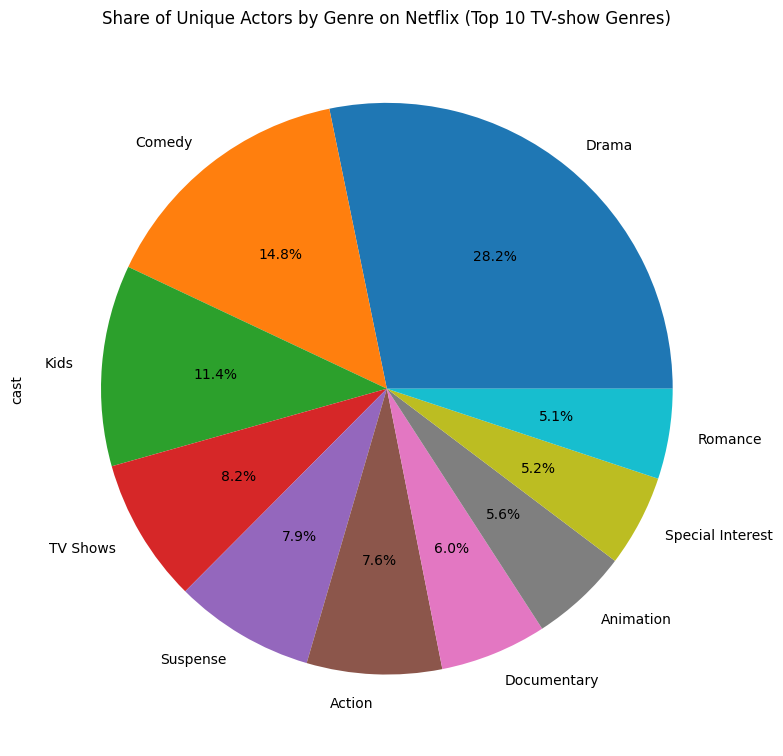

In [125]:
# Pie chart of unique actors per movie genre (top 10 genres only)       
tv_unique_actors_per_genre = unique_actors_per_genre(test_tv_shows_df)

top_n = 10
top_genres = tv_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.title("Share of Unique Actors by Genre on Netflix (Top 10 TV-show Genres)")
plt.tight_layout()
plt.show()

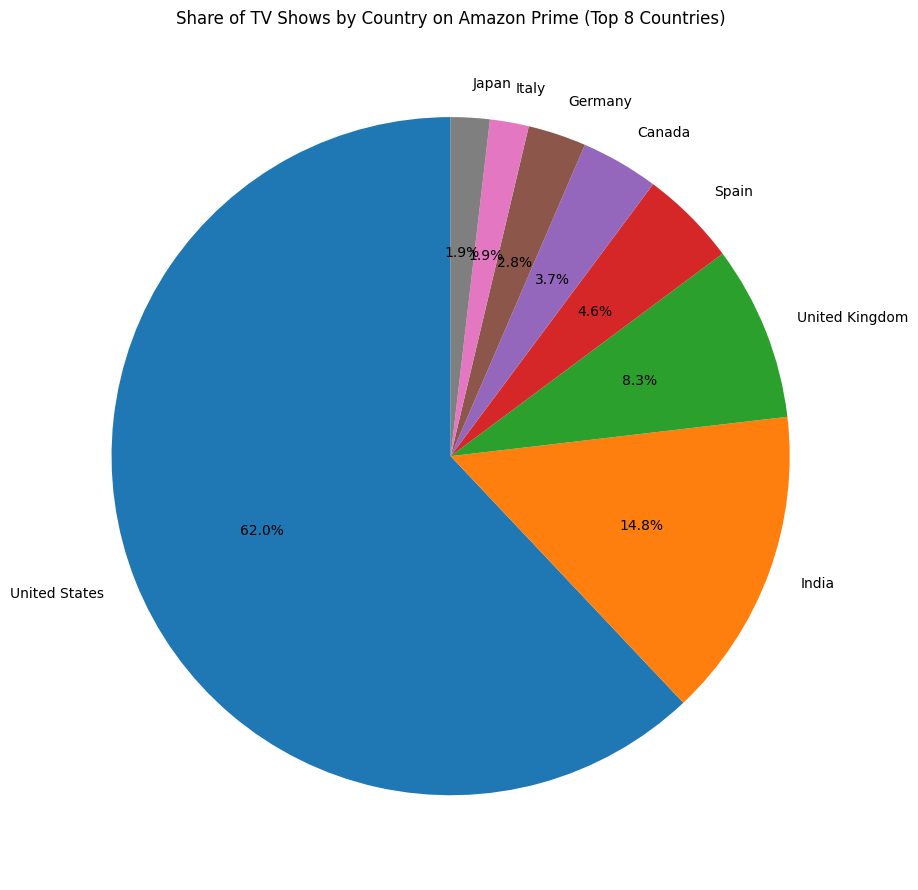

In [126]:
# Pie chart of unique countries where TV-shows are made per tv-show genre (top 8 countries only)

top_n = 8  # limited to 8 for readability of pie chart

# Explode list-of-countries into one country per row
show_countries = test_tv_shows_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
show_countries = show_countries.dropna()
show_countries = show_countries[show_countries != ""]          # just in case
# (after explode, rows that were [] become NaN & get dropped)

'''
Now, we count & plot the top countries, though we can only show a limited number in a pie chart, 
so we pick top_n of 8 in order to have a readable chart. Though there are more countries in the dataset, 
the pie chart would become unreadable with too many slices, due to shares taken by 'other' countries 
that are more popular to film & produce media in than the rest.
'''

top_show_countries = show_countries.value_counts().head(top_n)

plt.figure(figsize=(14, 9))
top_show_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of TV Shows by Country on Amazon Prime (Top 8 Countries)")
plt.tight_layout()
plt.show()

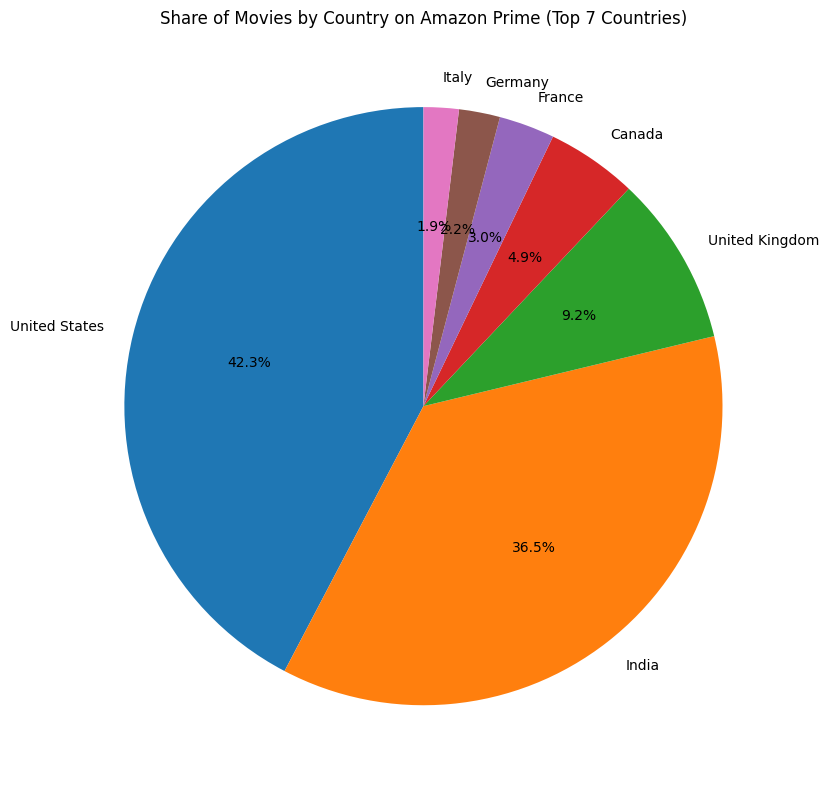

In [127]:
# Pie chart of unique countries where movies are produced per movie genre

top_n = 7  # limited to 7 for readability of pie chart

# Explode list-of-countries into one country per row
movie_countries = test_movies_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
movie_countries = movie_countries.dropna()
movie_countries = movie_countries[movie_countries != ""]          # just in case
# (after explode, rows that were [] become NaN & get dropped)

'''
Here we can only shown an even more limited number of countries in a pie chart, 
so we pick top_n of 7 in order to have a readable chart. Though there are more countries in the dataset, 
the pie chart would become unreadable with too many slices, due to shares taken by 'other' countries 
that are more popular to film & produce media in than the rest.
'''

top_movie_countries = movie_countries.value_counts().head(top_n)

plt.figure(figsize=(12, 8))
top_movie_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of Movies by Country on Amazon Prime (Top 7 Countries)")
plt.tight_layout()
plt.show()

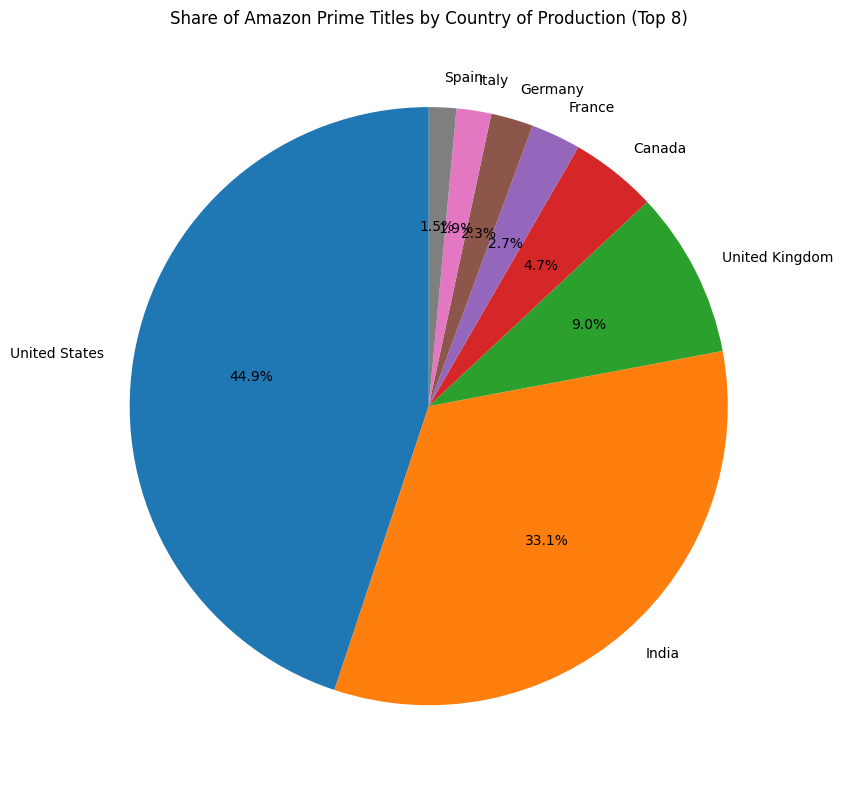

In [128]:
# Pie chart showing the share of Amazon Prime titles by country of production

top_n = 8  # limited to 8 for readability of pie chart

# Explode converts each list into separate rows so each country is counted individually
media_countries = test_amazon_df["country"].explode()

# As a precaution, remove missing or empty entries that result from empty lists
media_countries = media_countries.dropna()
media_countries = media_countries[media_countries != ""]   # extra safeguard

# Count how many titles are associated with each country
top_media_countries = media_countries.value_counts().head(top_n)

'''
Due to the smaller variety of countries in the Amazon Prime dataset being used more for media production,
the pie chart can accommodate a slightly lower number of countries (top 8) without becoming unreadable, compared to other platforms like netflix.
'''

# Plot pie chart
plt.figure(figsize=(12, 8))
top_media_countries.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.ylabel("")  # hide default y-axis label
plt.title("Share of Amazon Prime Titles by Country of Production (Top 8)")
plt.tight_layout()
plt.show()